# Pimchanok Khaophuthai
# EAI6000
# Mar 2, 2020

# Fashion classification with linear models
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We's see how well we can classify these with linear models. Let's start with looking at our data:

In [1]:
# General imports. Make sure you have recent versions off all required libraries installed.
%matplotlib inline
import openml as oml
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

/opt/anaconda3/envs/EAI6000NEU/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

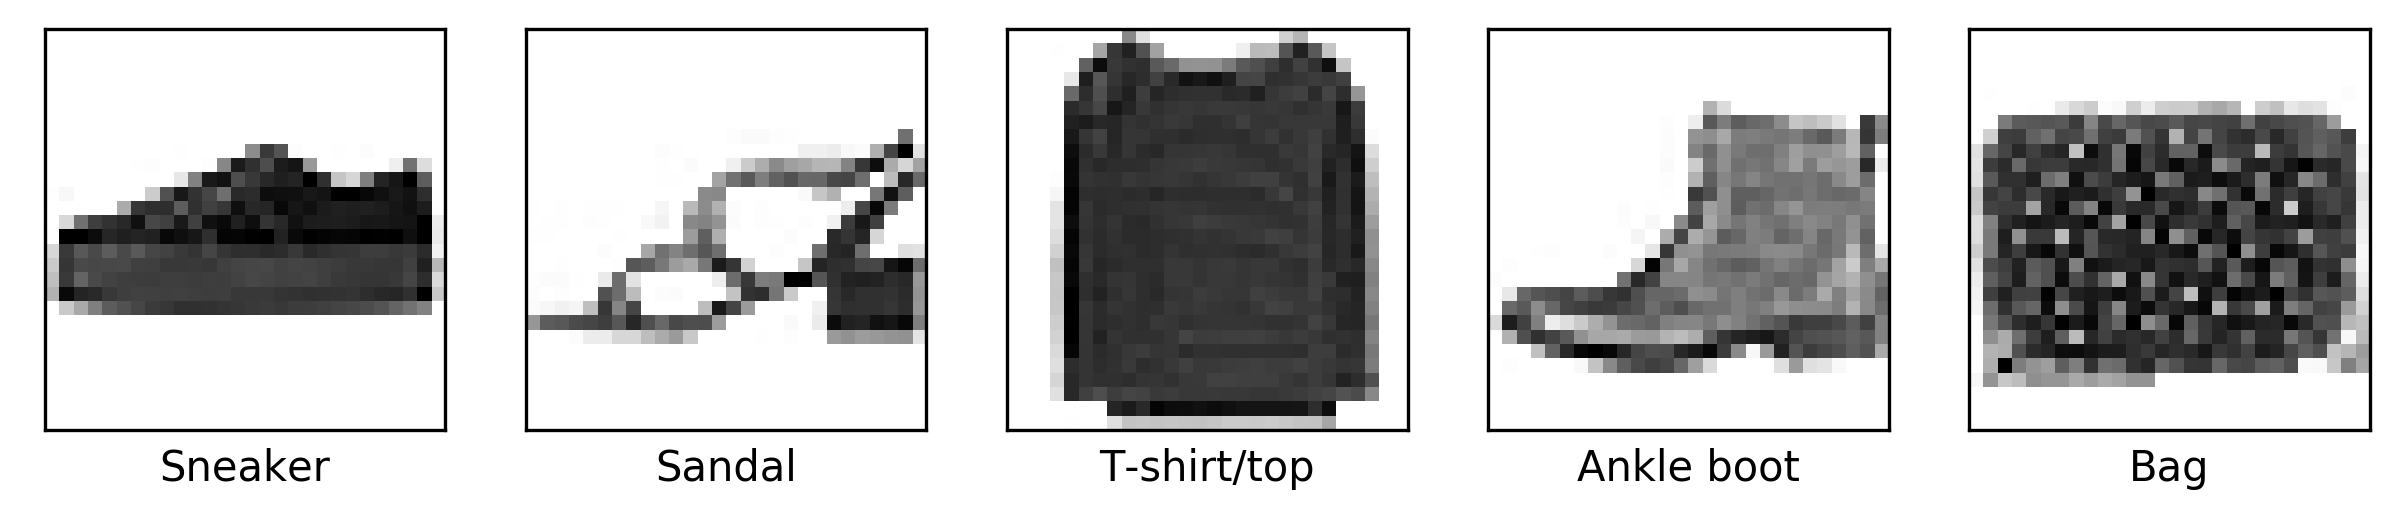

In [3]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Exercise 1: A quick benchmark
First, we'll try the default [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVMs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Click the links to read the documentation. We'll also compare it to [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) instead of  [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

For now we are just interested in a quick approximation, so we don't use the full dataset for our experiments. Instead, we use 10% of our samples:

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [5]:
print(Xs.shape, ys.shape)

(7000, 784) (7000,)


With this small sample of our data we can now train and evaluate the three classifiers.

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below the function you will find example output.

In [6]:
from sklearn.model_selection import cross_validate
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    score = [cross_validate(c, X, y, return_train_score=True, n_jobs=-1, cv=5) for c in classifiers]
    train_scores = [s['train_score'] for s in score]
    test_scores = [s['test_score'] for s in score]
    return train_scores, test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                               [0.867, 0.868, 0.865, 0.866, 0.866]], # Classifier 3 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.
#                               [0.804, 0.814, 0.806, 0.821, 0.806]]) # Classifier 3 test score for each of 5 folds.

### Exercise 1.2
Call the function you created with a Logistic Regression, Linear SVM, and k-Nearest Neighbors Classifier.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [7]:
# Dummy code. Replace with the actual classifiers and scores

classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

In [8]:
print(train_scores)
print(test_scores)

[array([0.911, 0.913, 0.918, 0.916, 0.916]), array([0.932, 0.941, 0.955, 0.963, 0.957]), array([0.857, 0.862, 0.867, 0.864, 0.864])]
[array([0.814, 0.817, 0.799, 0.808, 0.823]), array([0.751, 0.753, 0.759, 0.776, 0.777]), array([0.819, 0.809, 0.793, 0.806, 0.809])]


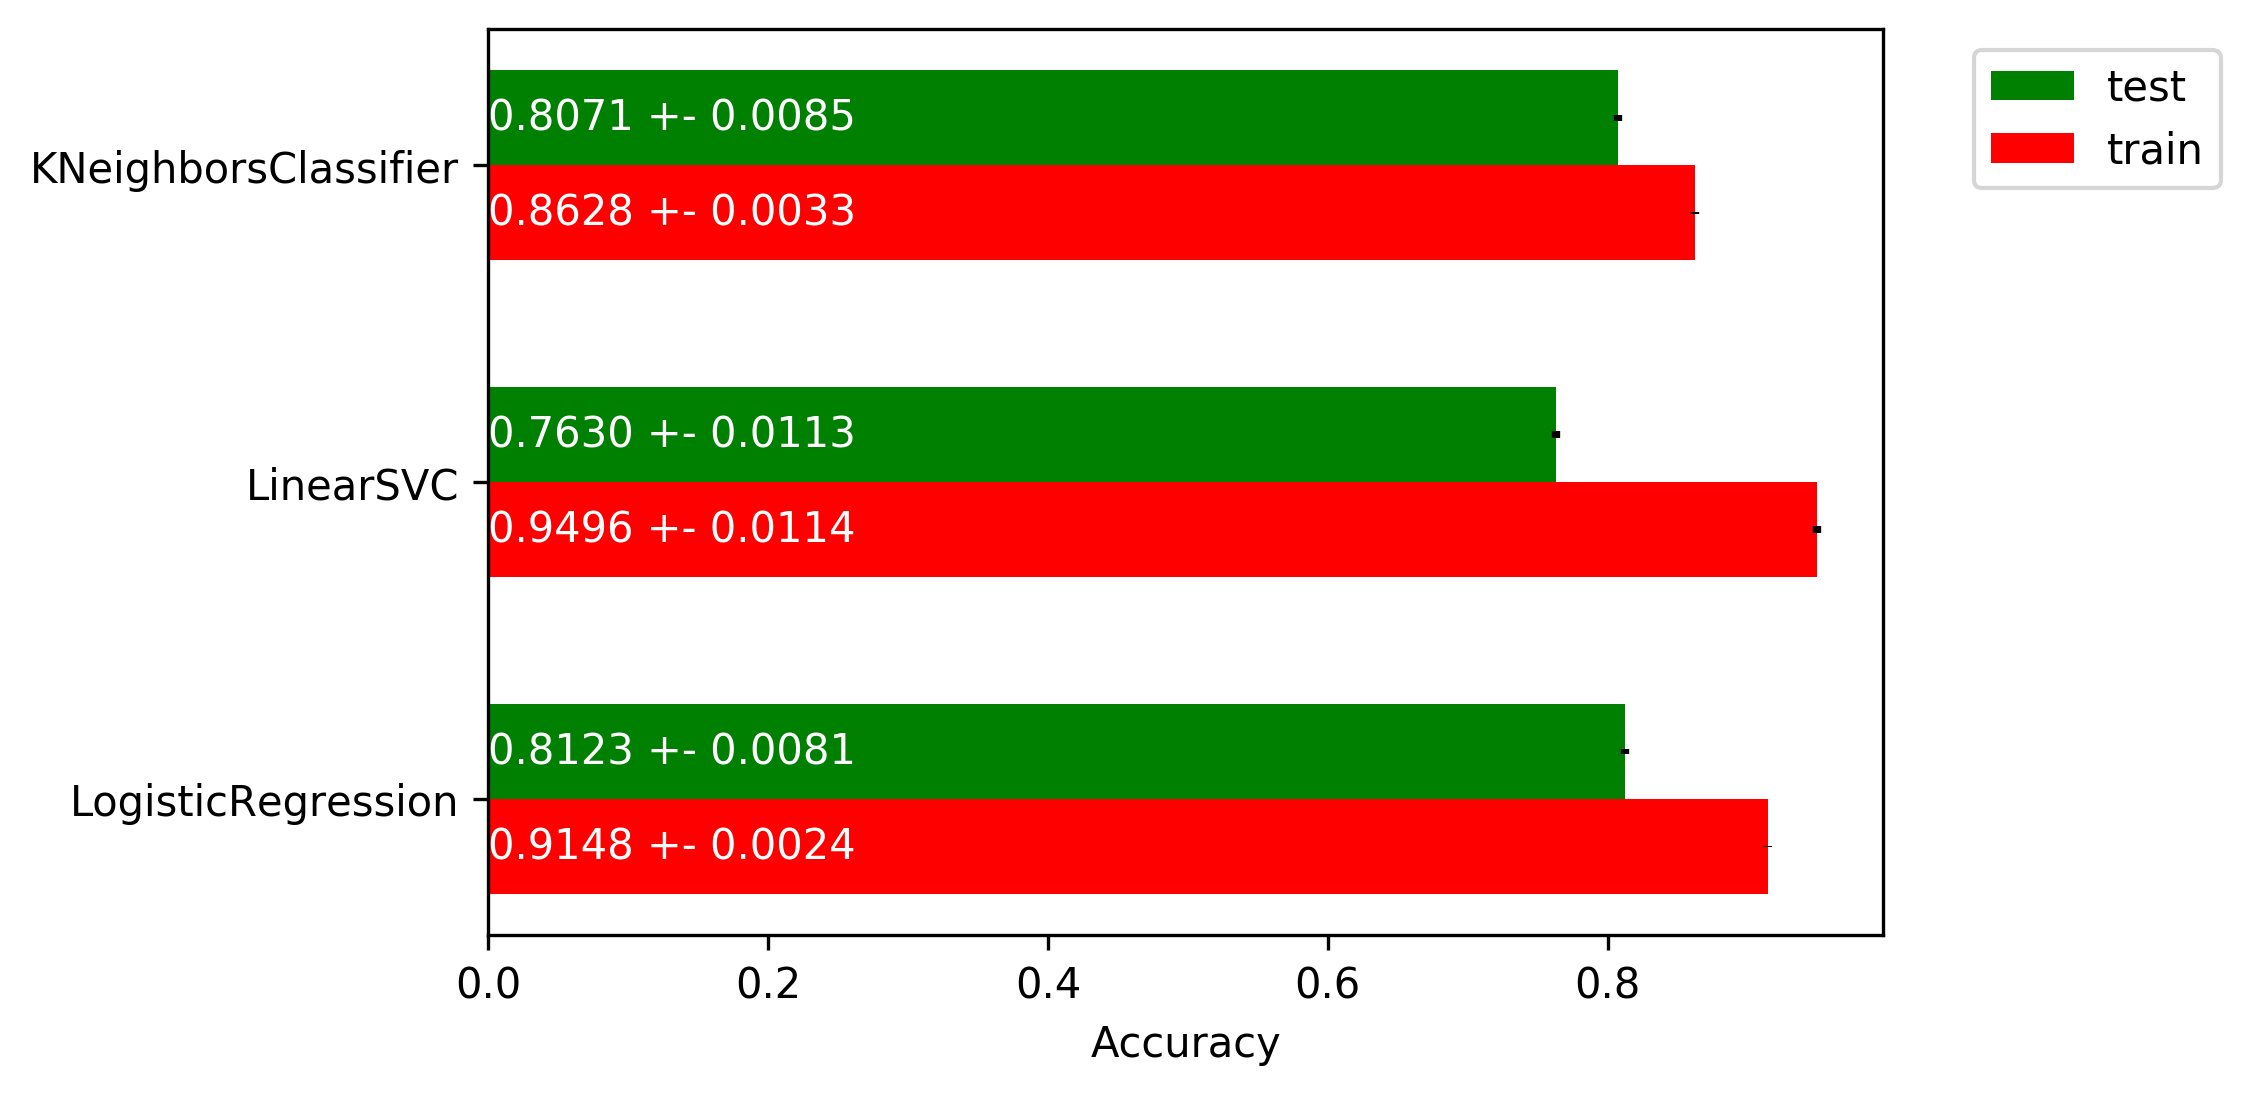

In [9]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercise 1.3
Interpret the plot. Which is the best classifier? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

#### Answer

KNeighborsClassifier and Logistic Regression perform equally well with test score a bit over 0.80. LinearSVC is the worst Classifier among the three with score 0.75. LinearSVC and LogisticRegression could be moderately overfit. Adjusting regularization parameters in LinearSVC and LogisticRegression could be used to reduce overfitting.

## Exercise 2: Regularization
We will now tune these algorithm's main regularization hyperparameter: the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for the C parameters to lie in $[10^{-10},10^{2}]$ and for n_neighbors between 1 and 100. C should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the regularization parameters in the range given above and, for each classifier, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each classifier. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Grid parameters
param_c = {'C':np.logspace(-10,2, num = 30)[16:]}
param_knn = {'n_neighbors':np.geomspace(1, 100, num=10, dtype=int)[1:]}

models = [LogisticRegression(solver = 'saga'), LinearSVC(), KNeighborsClassifier()]
grids = [param_c, param_c, param_knn]

In [11]:
# Scaled the feature to fasten the search
scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)

In [12]:
grid_search = [GridSearchCV(model, param, cv=5, return_train_score=True, n_jobs=-1) for model, param in zip(models,grids)]

In [13]:
log_grid = grid_search[0].fit(Xs_scaled,ys)

/opt/anaconda3/envs/EAI6000NEU/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
svm_grid = grid_search[1].fit(Xs_scaled,ys)

In [15]:
knn_grid = grid_search[2].fit(Xs_scaled,ys)

In [16]:
# Generic plot for 1D grid search
def plot_tuning(grid_search, param_name, ax):
    """
    grid_search: the result of the GridSearchCV
    param_name: the name of the parameter that is being varied
    """
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend(loc='lower left')
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs+0.01,"  best:{:.2E}, R2:{:.4f}".format(bp,bs))

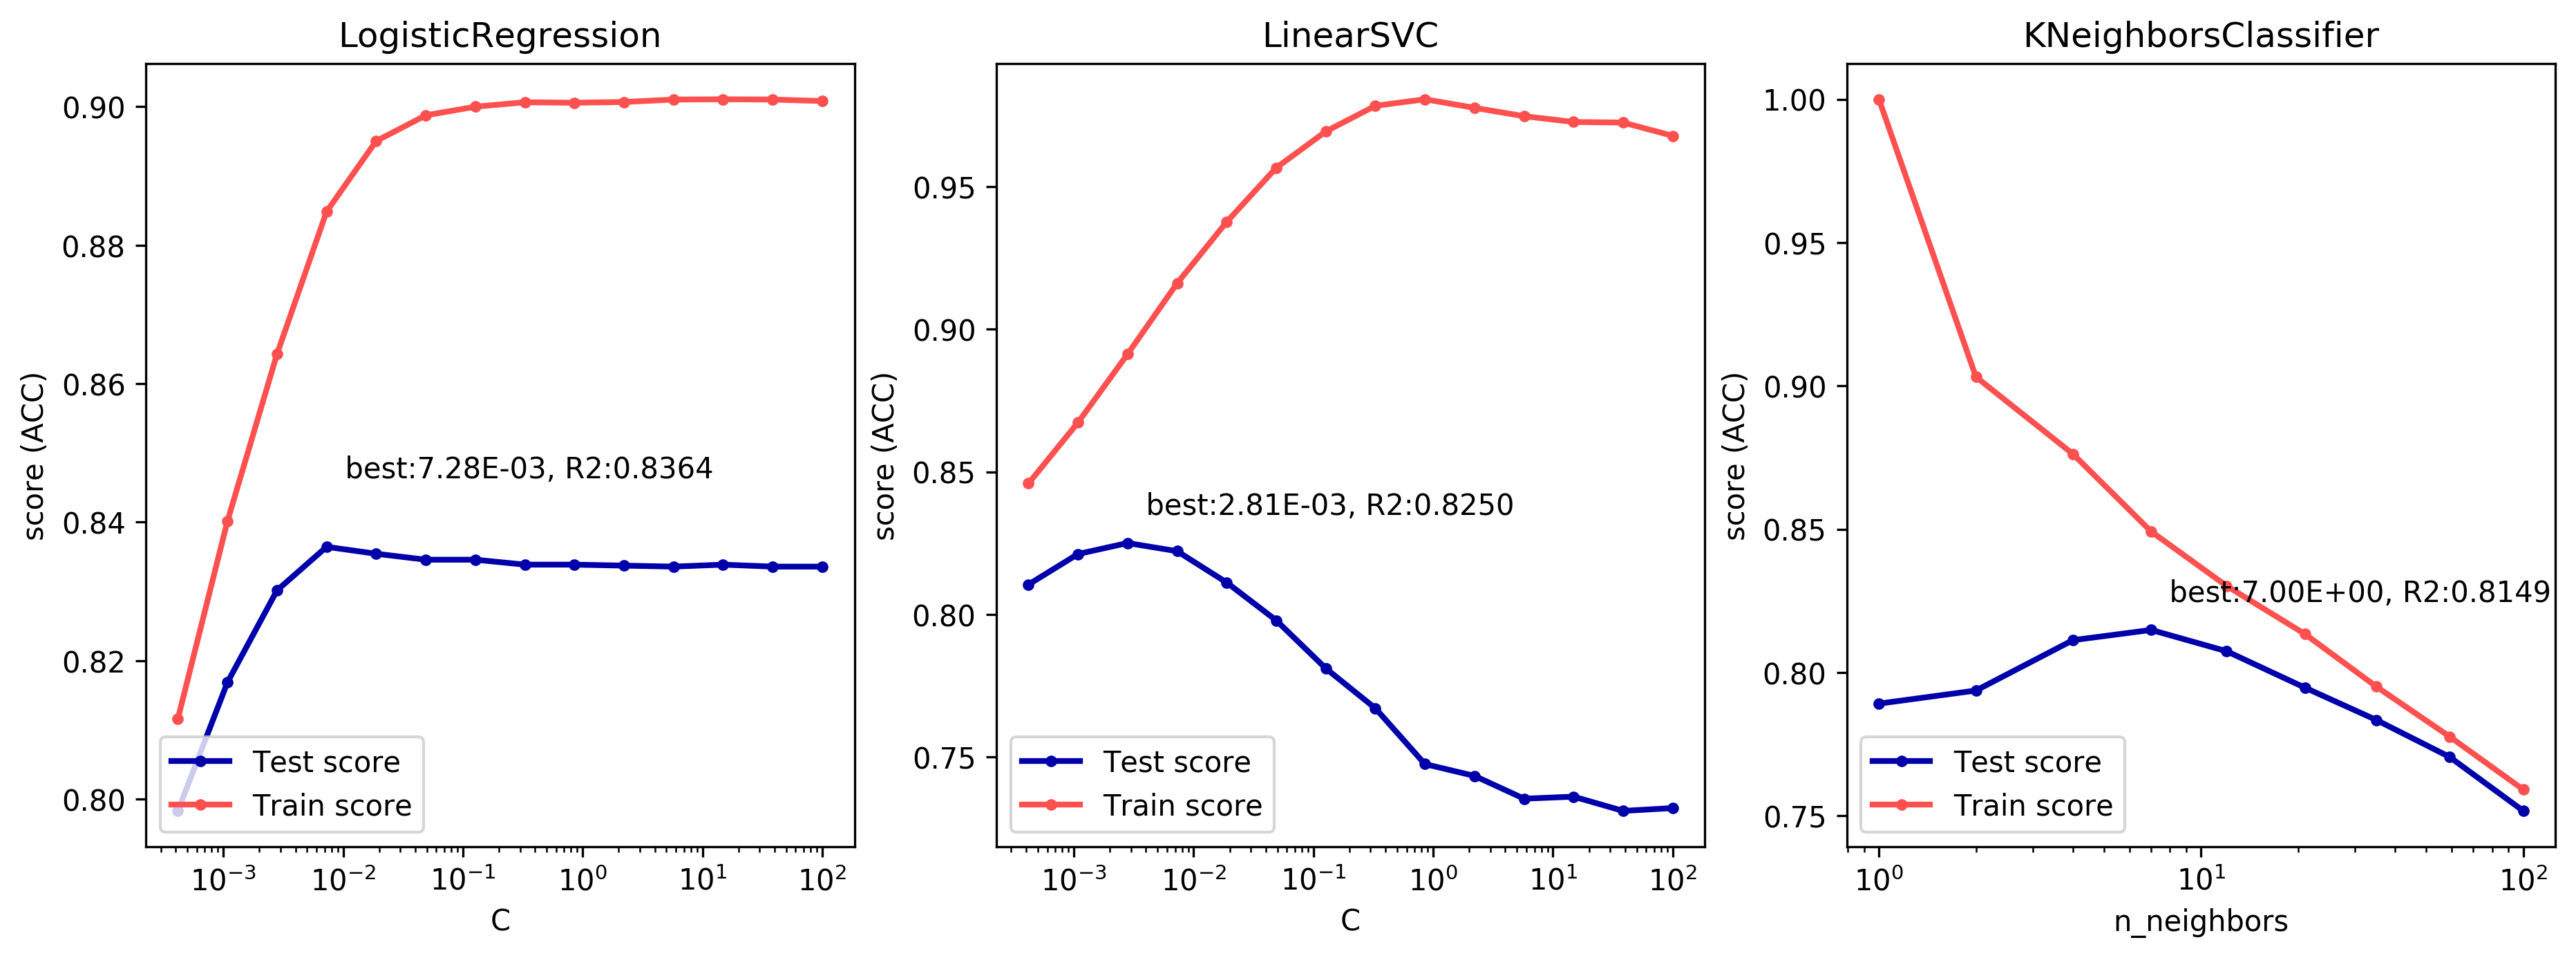

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))
for grid_search, param, ax in zip([log_grid, svm_grid, knn_grid ], ['C','C','n_neighbors'], axes):
    plot_tuning(grid_search, param, ax)

### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

#### Answer

LogisticRegression and LinearSVC scores do not converge as regularizaiton decreses and they perform better with some degree of regularlization. In sklean module, C is the inverse of regulatization strength where the smaller is the stronger regularization. <br><br>
LogisticRegression and LinearSVC are badly overfitting as C increases (regularization decreases). LogisticRegression is best when it is regularized at C = 0.0072, but stronger regularization will deteriorate the accuracy. LinearSV also performs better with regularization (C=0.0028), it badly overfits when hyperparameter increases.<br><br>
KNeighborsClassifier overfits when the number of neighbors are small, but it is best at 7 neighbors. More than 4 neighbors causes the ACC to gradually decreases. 

## Exercise 3: Interpreting misclassifications
Chances are that your models are not yet perfect. It is important to understand what kind of errors it still makes. Let's take a closer look at which instances are misclassified and which classes are often confused.
Train the logistic regression model with `C=1e-6`. Train the model on a training set, and make predictions for a test set (both sets should be  sampled from our 10% subsample).

In [18]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, stratify=ys, random_state=0)

### Exercise 3.1
Train the classifier as described above, obtain the predictions `y_pred` on the test set, and identify all the misclassified samples `misclassified_samples`. Then, run the visualization code below to study the misclassifications

In [19]:
log_model = LogisticRegression(C = 1e-6, max_iter = 1000).fit(X_train, y_train)

In [20]:
pred = log_model.predict(X_test)

In [21]:
# Implement the code to obtain the actual predictions on the test set
y_pred = list(pred) # dummy values, replace y_test with the actual predictions

# Implement the code to obtain the indices of the misclassified samples

# Example output:
# misclassified_samples = [  11,   12,   14,   23,   30,   34,   39,   46,   50,   52,   55]
misclassified_samples = [x for t in np.where(y_pred != y_test) for x in t]  # dummy values

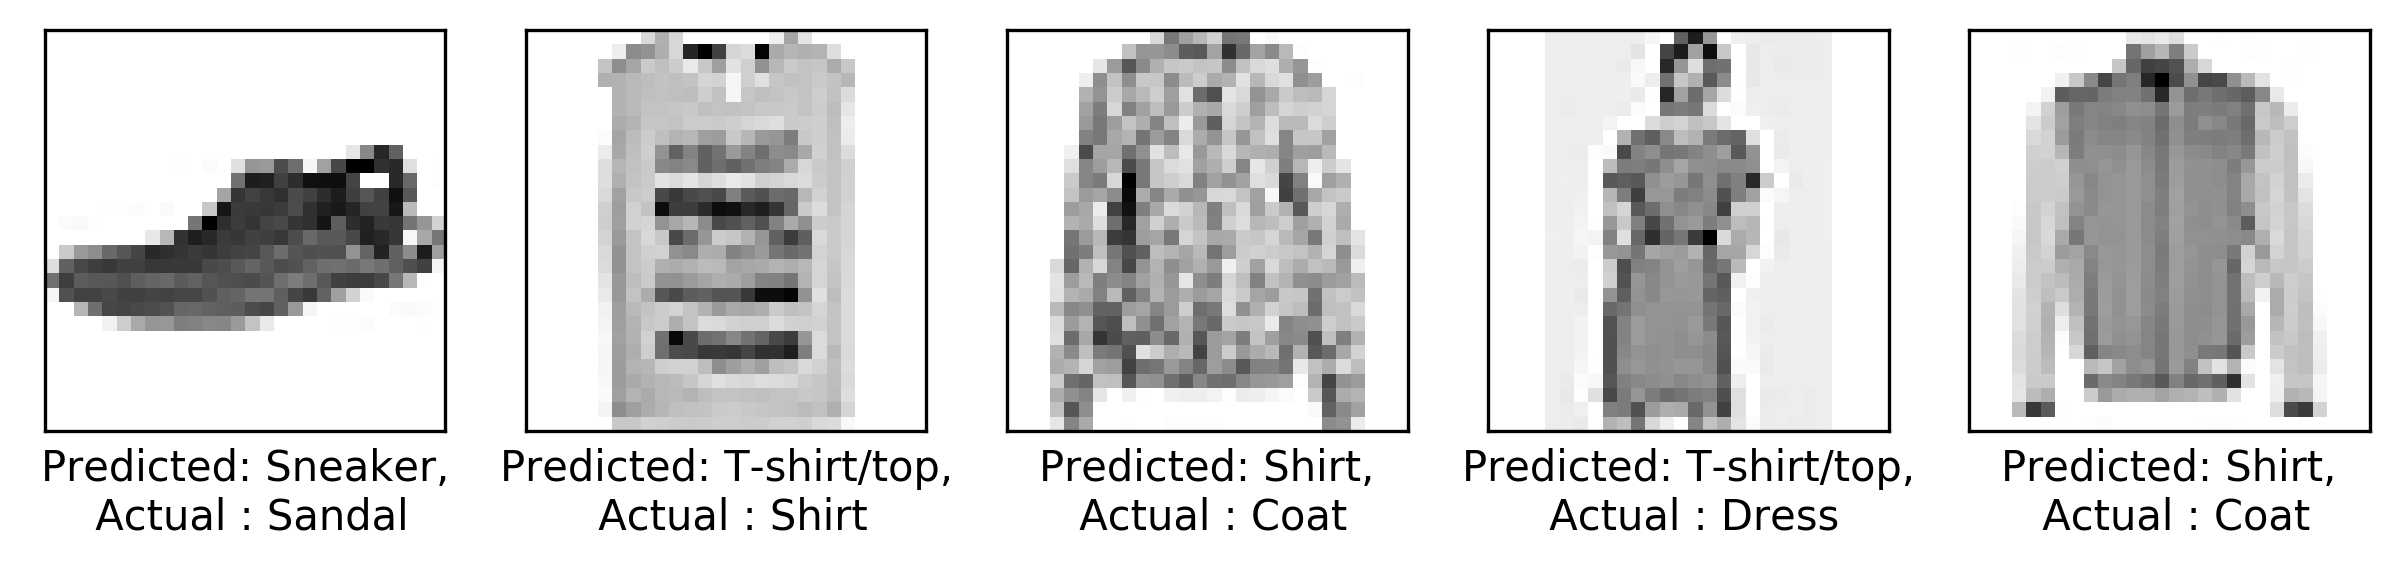

In [22]:
# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### Exercise 3.2
Interpret the results. Are these misclassifications to be expected? 

#### Answer

These misclassifications are expected as the actual values look similar to what the models predicted. For indtance, Dress vs Trouser, although this does look like a trouser, it is not clear, human can see this as a jumper as well. Shirt vs Pull over, the two categories do in fact look similar to each other. 

### Exercise 3.3.
Run the code below on your results to draw the complete confusion matrix and get more insight on the systematic misclassifications 
of your model. A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. 
Does your model produce certain types of error more often than other types? 

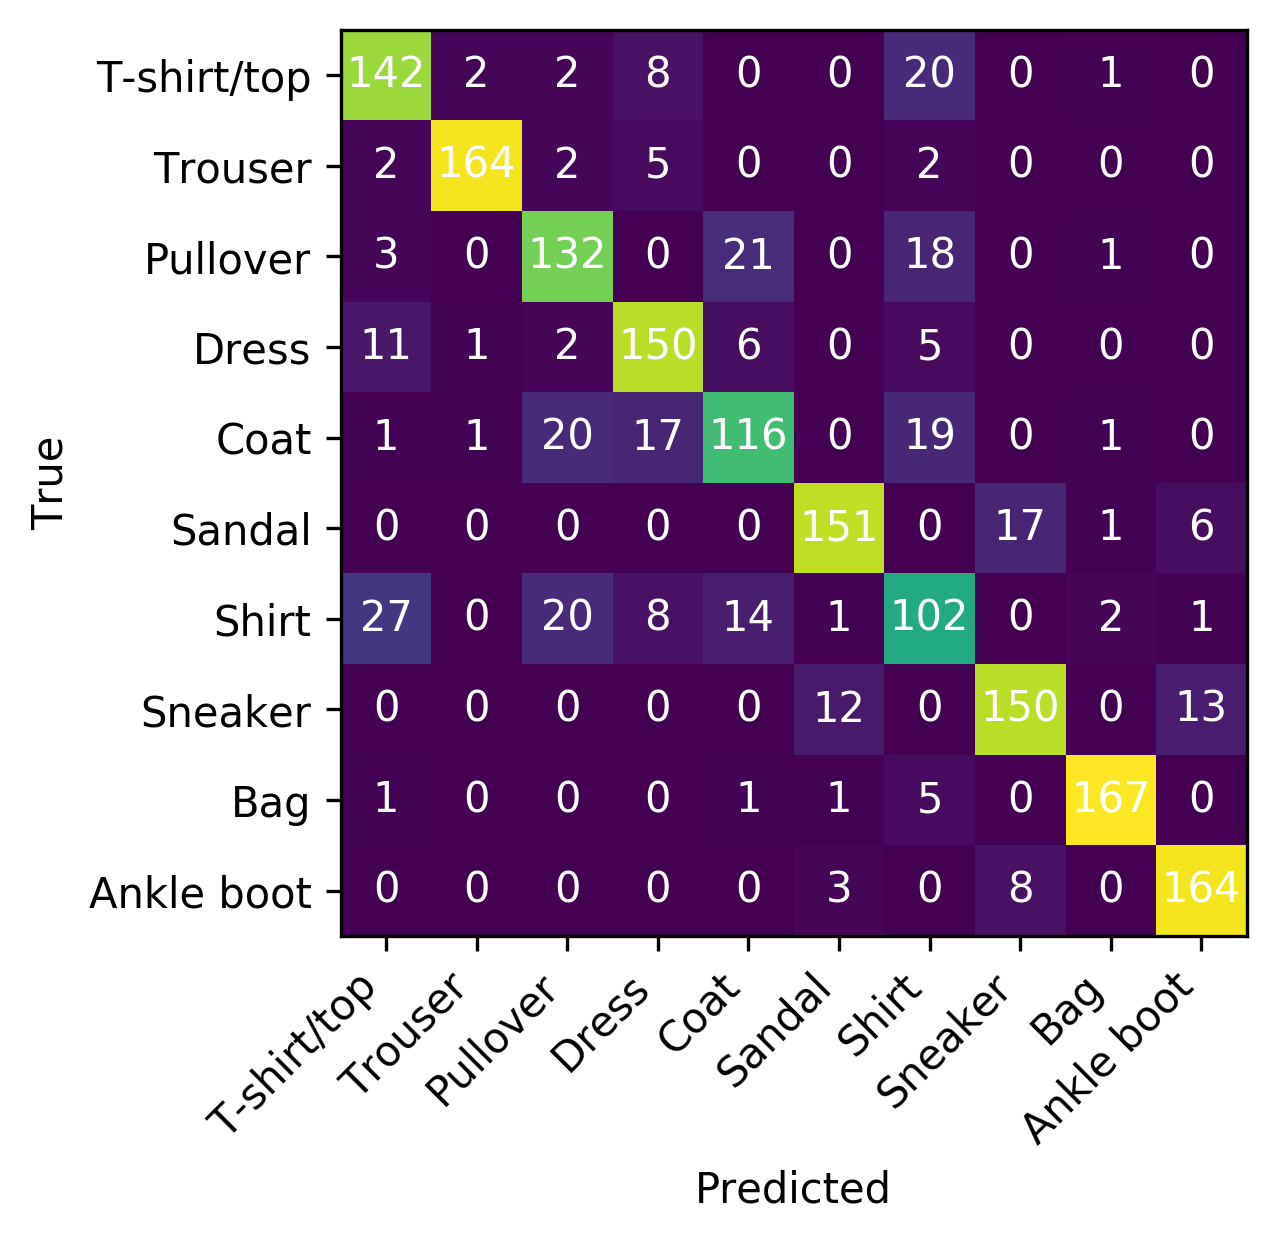

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

#### Answer

The model often misclassifies the tops categories (T-shirt/Top, Pullover, Coat and shirt). Shirt is predicted as T-shirt/Top, Pullover, and Coat and these three categories are predicted as shirt. It is presumably that they have similar appearance and only minor details that makes them different, so the model cannot capture such different. The same case also applies to the shoes type where we see the model confuses between sneaker, sandla and Ankle boot. However, the misclassification in the tops category is still the worst.

## Exercise 4: Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Exercise 4.1
Train a Logistic Regression model and a Linear SVM using their tuned hyperparameters from exercise 2. 
When in doubt, use `C=1e-7` for LogReg and `C=1e-8` for the SVM. 
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes? Do you observe any differences between the models?

In [24]:
logReg = LogisticRegression(C=log_grid.best_params_['C'], max_iter=1000).fit(X_train,y_train)
SVM = LinearSVC(C=svm_grid.best_params_['C']).fit(X_train,y_train)

/opt/anaconda3/envs/EAI6000NEU/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/EAI6000NEU/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

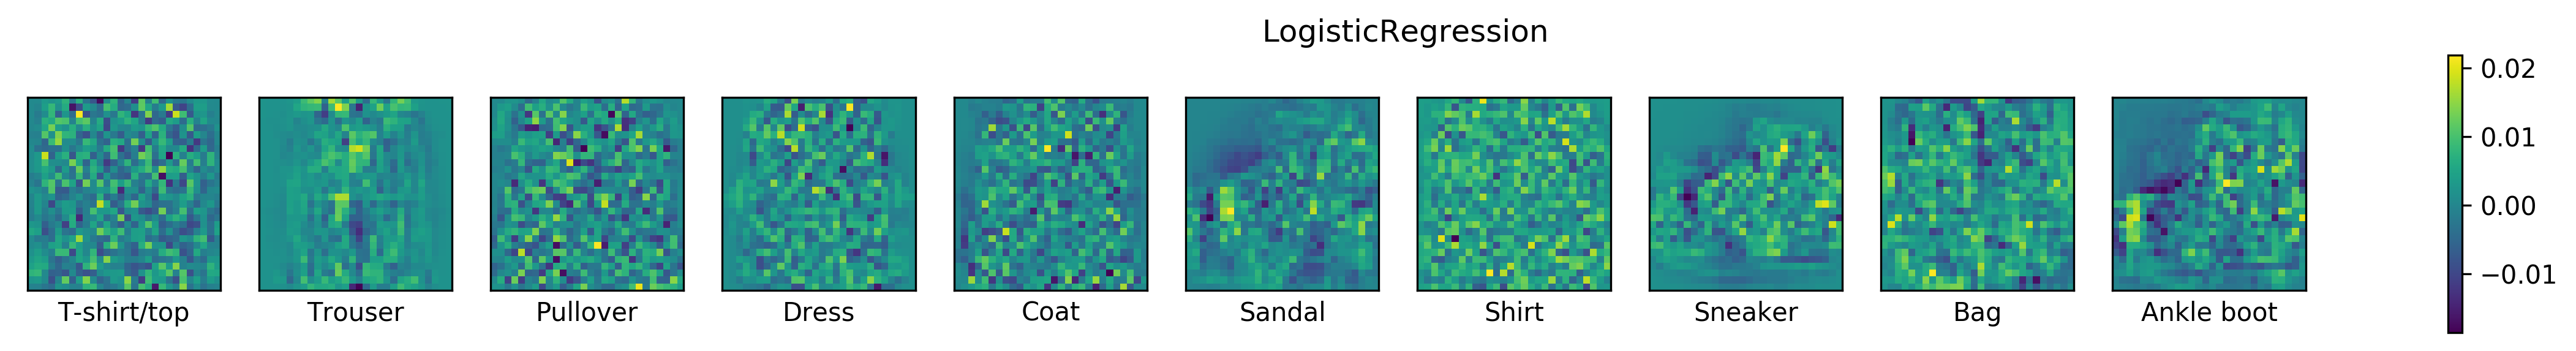

In [26]:
plot_coefficients(logReg)

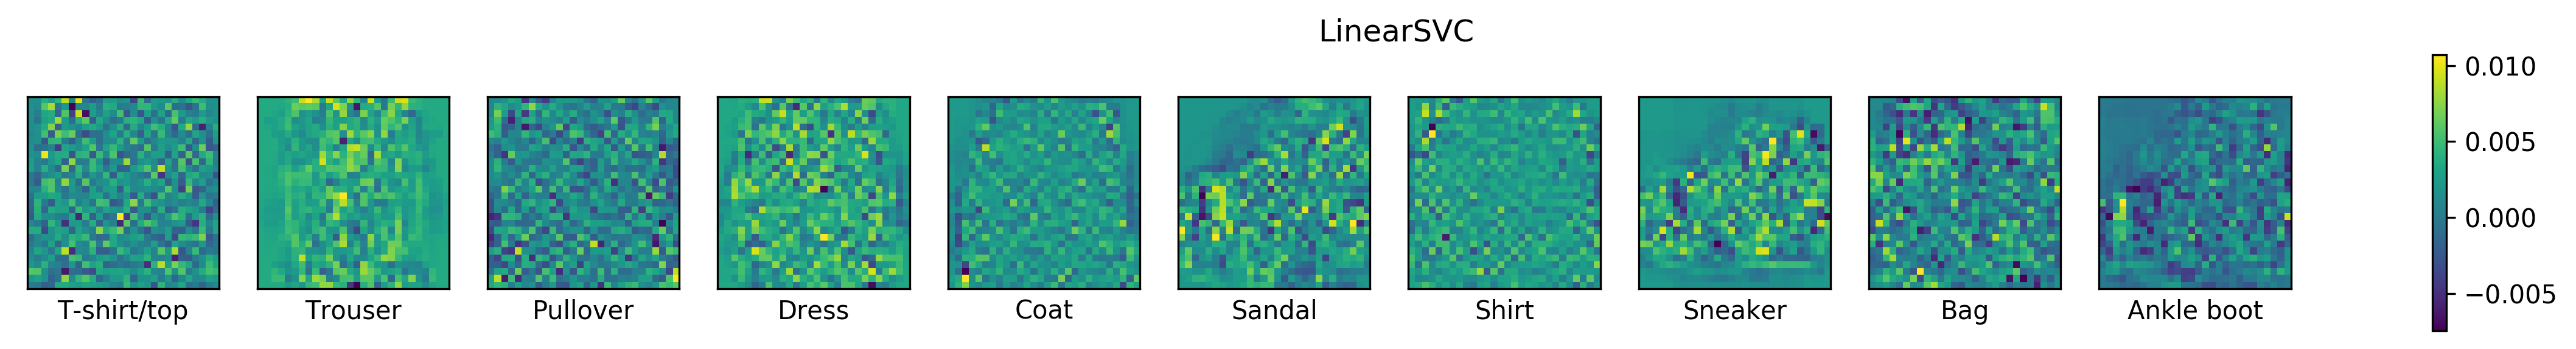

In [27]:
plot_coefficients(SVM)

#### Answer

There are 10 plots for each model as there are 10 classes to be classified. The features in the model is the pixels in the picture. When a coefficient of a pixel is positive (lighter color) in a class, it means the pixel makes the class what it is. The models ignore the background as it assign 0 coefficient to thefeatures. LinearRegression and LinearSVC learn the pixel similarly in the sense that some of the positive values are in the same features(pixel) for both models. The difference is that they assign the values differently. Apparently, LogisticRegression pays attention to the pixels that form the edge of the picture more than LinearSVC. For instance, in Ankle boot and Sandal. 

The plots also explain why the model misclassifies tops categories. We can see that though they are classified differently, the coefficients of these categories (T-shirt/top, Pullover, Coat, and Shirt) are very similar.


### Exercise 4.2
Repeat the previous exercise, but now only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

#### Underfitting 
From sklearn module, the C parameter in LogisticRegresion and SVM is the "inverse of regularization strength where smaller values specify stronger regularization". <br><br>
To produce an underfit model, the regularization parameter is set to be very small (C=1e-22). It will underfit the model as it will set a number of features to zero and the model will not use all the features

In [28]:
logReg_u = LogisticRegression(C=1e-22, max_iter=1000).fit(X_train,y_train)
SVM_u = LinearSVC(C=1e-20).fit(X_train,y_train)

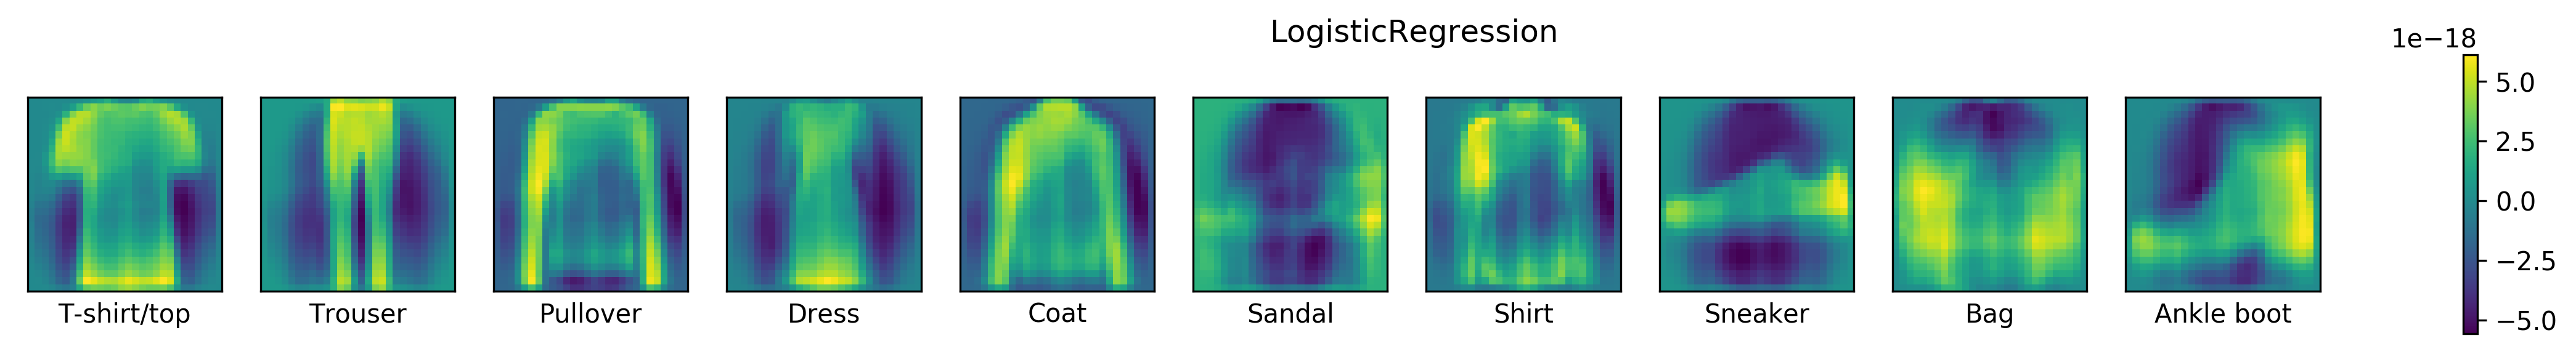

In [29]:
plot_coefficients(logReg_u)

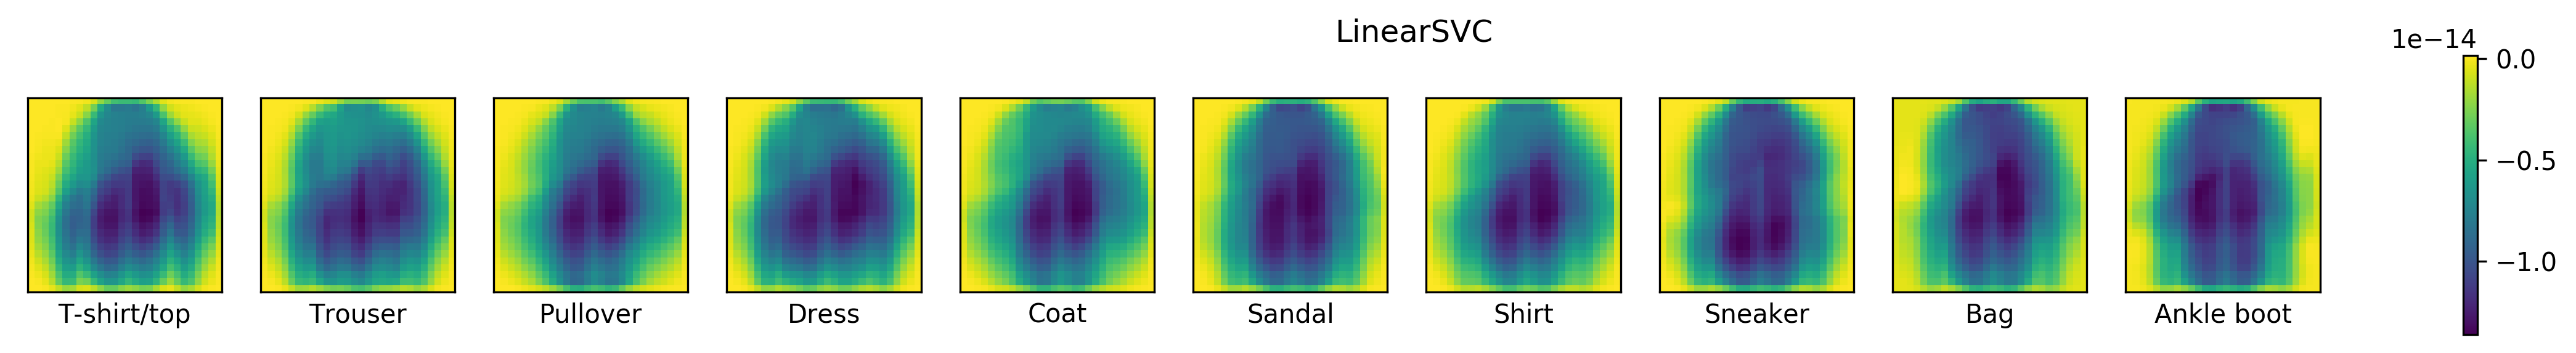

In [30]:
plot_coefficients(SVM_u)

#### Answer

In underfitting circumstance, the coefficients learned from the two models are very small and we can observe some confusion in the plots as there are overlapping of classes in one plot. LogisticRegression learns the coefficient that significant to each class but within the same class another class also exist. In sandal, the light color (+ve coeffcient) is highligthing sandal but the darker (-ve coefficient)is highlighting other classes.<br><br>
LinearSVC coefficients for different classes are indifferent. It can barely detect the different class. With extremely strong regularization, the model fails to capture the complexity as we can see classes overlaping in one plot.

#### Overfitting
Conversely to underfitting, the regularization parameter is set to be very high (C=1e+200) so that the regularization strenght is very low and to no regularization at all

In [31]:
logReg_o = LogisticRegression(C=1e+200, max_iter=1000).fit(X_train,y_train)
SVM_o = LinearSVC(C=1e+200).fit(X_train,y_train)

/opt/anaconda3/envs/EAI6000NEU/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


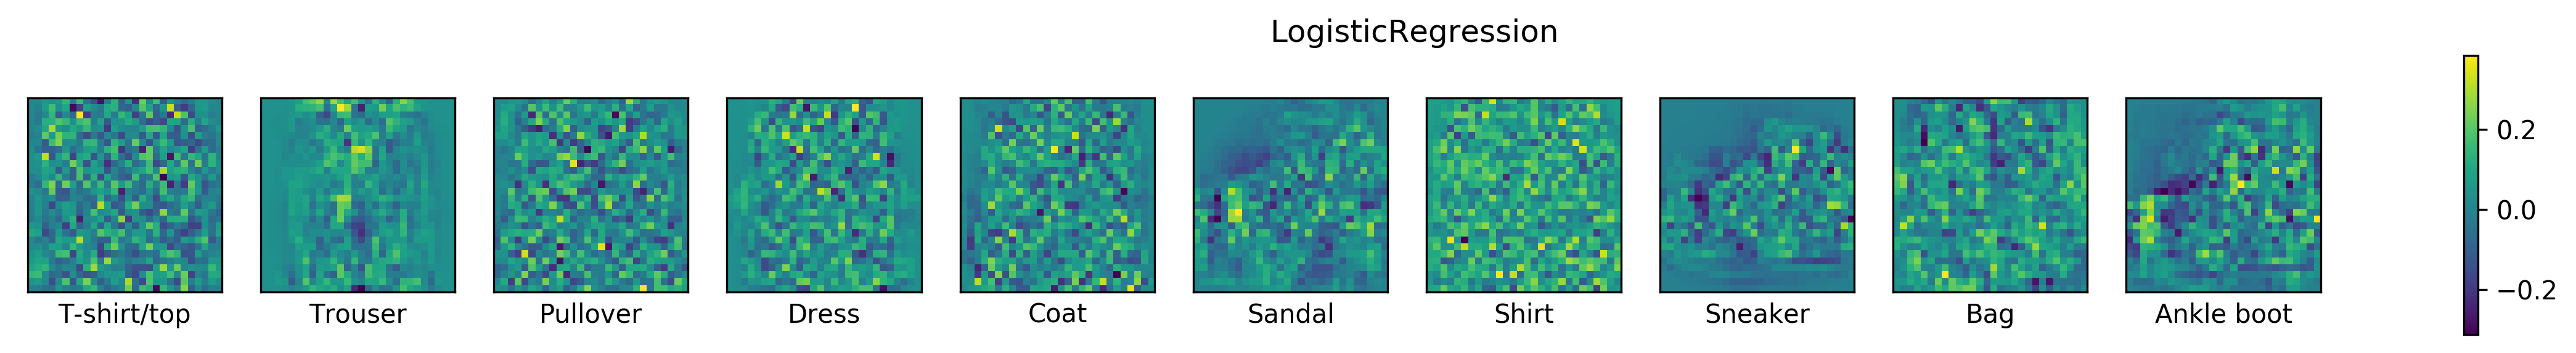

In [32]:
plot_coefficients(logReg_o)

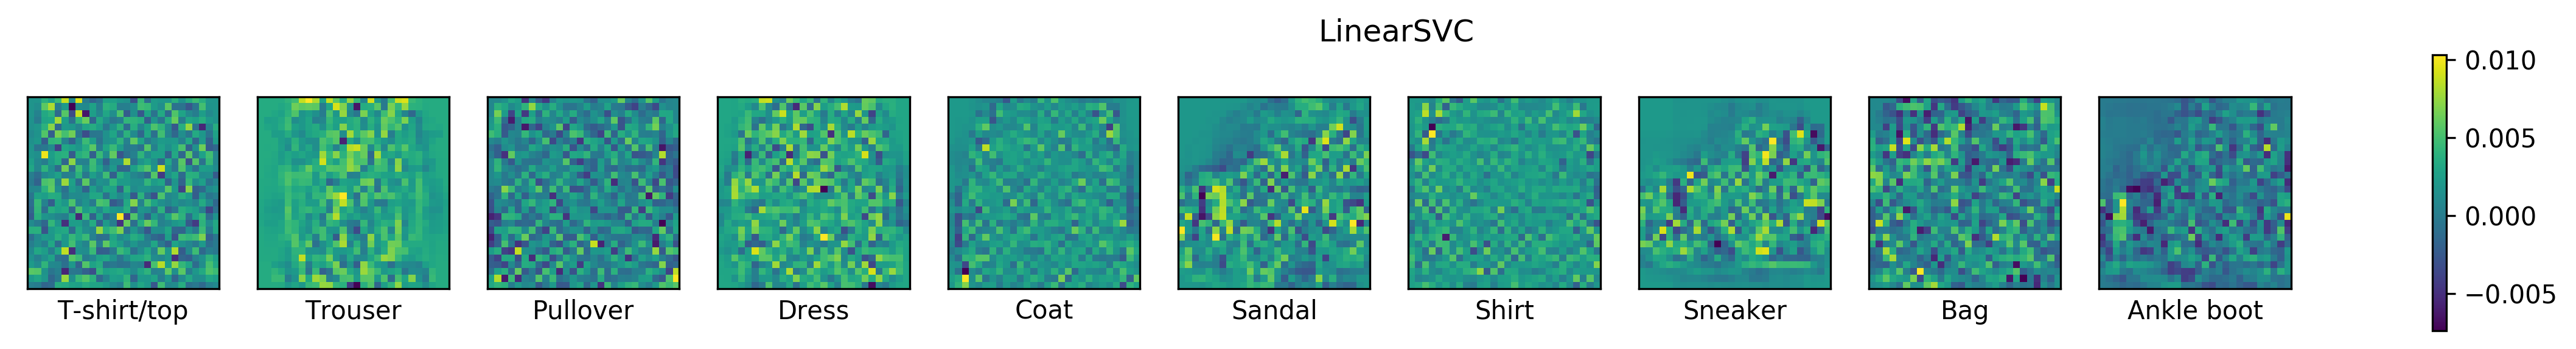

In [33]:
plot_coefficients(SVM_o)

#### Answer

Overfitting models are trying to capture all the features in each class. Small details are being captured. For instance, almost every pixel in shirt class has some effects (coefficient), even the background. In prediction, if the unseen data has something in the background, the model can be very sensitive and predict incorrectly.